# How did the historical prices / market capitalizations of various currencies change over time?

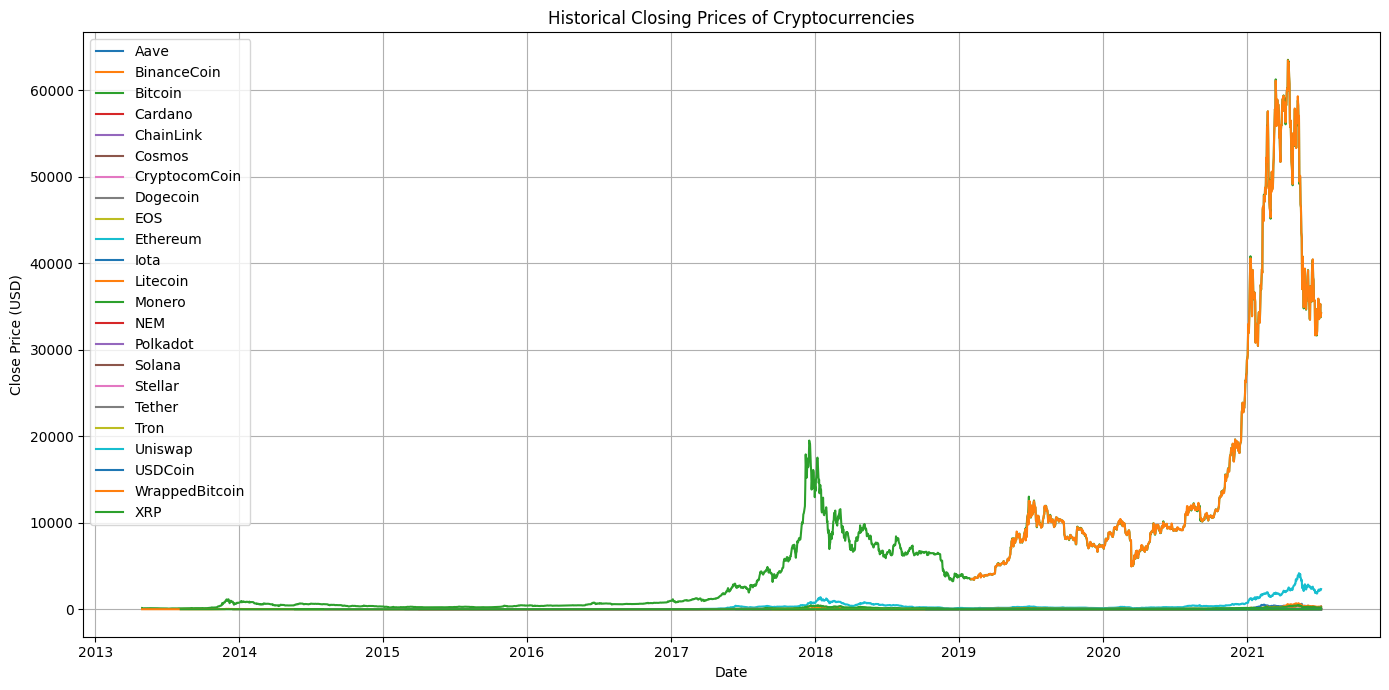

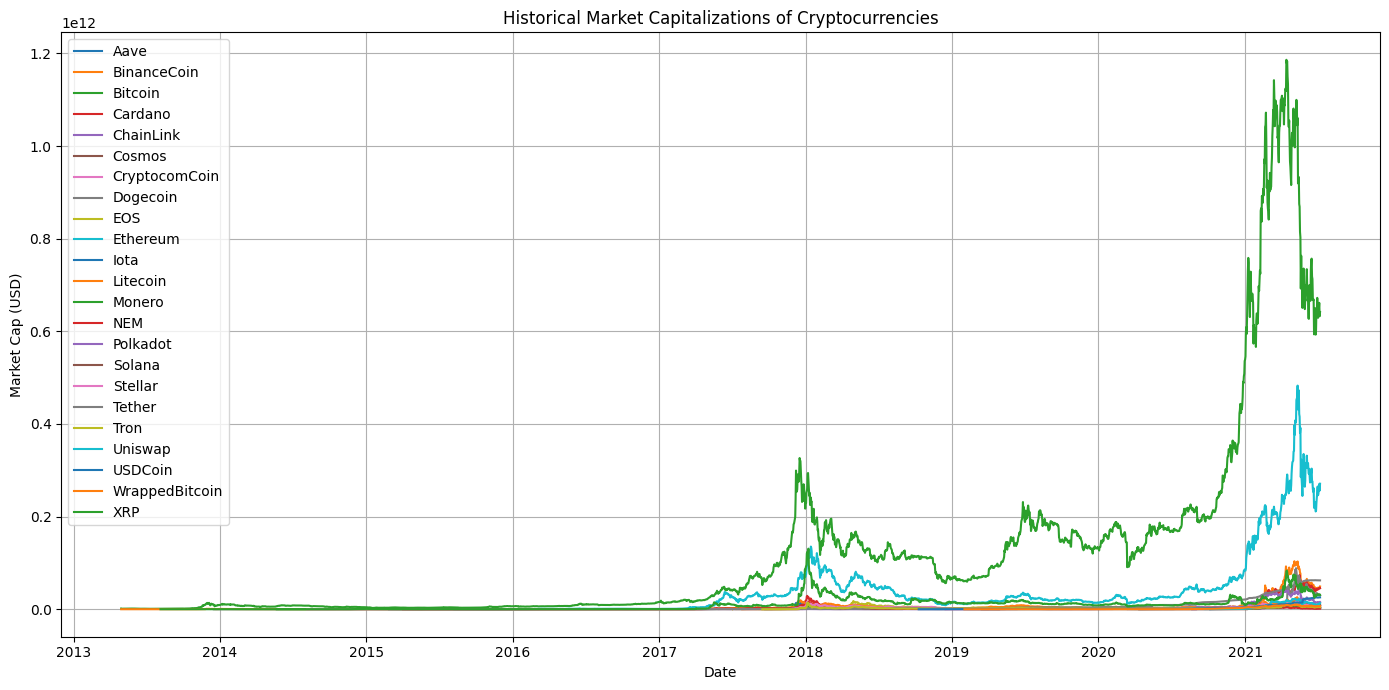


Summary Table with Trend Analysis:
      currency  start_close    end_close  pct_change_close    std_close trend_close  start_marketcap  end_marketcap  pct_change_marketcap  std_marketcap trend_marketcap
          Aave    53.219243   316.898507        495.458503   161.649917  Increasing     8.912813e+07   4.066776e+09          4.462842e+03   2.066558e+09      Increasing
   BinanceCoin     0.105138   320.934802     305151.015659   115.390917  Increasing     1.051380e+07   4.924196e+10          4.682555e+05   1.780041e+10      Increasing
       Bitcoin   144.539993 34235.193451      23585.619926 11298.141921  Increasing     1.603769e+09   6.418992e+11          3.992442e+04   2.109438e+11      Increasing
       Cardano     0.025932     1.418053       5368.392753     0.409691  Increasing     6.288991e+08   4.530158e+10          7.103314e+03   1.303878e+10      Increasing
     ChainLink     0.169680    20.080466      11734.315516     9.898517  Increasing     5.938800e+07   8.775356e+09    

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set your actual folder path here

folder_path = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'

# Initialize an empty DataFrame to hold combined data
combined_data = pd.DataFrame()

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        currency_name = filename.split('_')[1].replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Standardize column names
        df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

        # Check if required columns exist
        required_cols = {'date', 'close', 'marketcap'}
        if not required_cols.issubset(df.columns):
            print(f"Skipping {filename} due to missing columns.")
            continue

        df['currency'] = currency_name
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Check if any data was loaded
if combined_data.empty:
    print("No valid data loaded. Please check your CSV files.")
else:
    # Convert date column
    combined_data['date'] = pd.to_datetime(combined_data['date'])

    # Plot closing prices
    plt.figure(figsize=(14, 7))
    for currency in combined_data['currency'].unique():
        data = combined_data[combined_data['currency'] == currency]
        plt.plot(data['date'], data['close'], label=currency)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title('Historical Closing Prices of Cryptocurrencies')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot market caps
    plt.figure(figsize=(14, 7))
    for currency in combined_data['currency'].unique():
        data = combined_data[combined_data['currency'] == currency]
        plt.plot(data['date'], data['marketcap'], label=currency)
    plt.xlabel('Date')
    plt.ylabel('Market Cap (USD)')
    plt.title('Historical Market Capitalizations of Cryptocurrencies')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def trend_direction(series):
    if series.iloc[-1] > series.iloc[0]:
        return 'Increasing'
    elif series.iloc[-1] < series.iloc[0]:
        return 'Decreasing'
    else:
        return 'Stable'

summary_table = combined_data.groupby('currency').agg(
    start_close=('close', lambda x: x.iloc[0]),
    end_close=('close', lambda x: x.iloc[-1]),
    pct_change_close=('close', lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100),
    std_close=('close', 'std'),
    trend_close=('close', trend_direction),
    start_marketcap=('marketcap', lambda x: x.iloc[0]),
    end_marketcap=('marketcap', lambda x: x.iloc[-1]),
    pct_change_marketcap=('marketcap', lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if x.iloc[0] != 0 else float('inf')),
    std_marketcap=('marketcap', 'std'),
    trend_marketcap=('marketcap', trend_direction)
).reset_index()

print("\nSummary Table with Trend Analysis:")
print(summary_table.to_string(index=False))

How big is Bitcoin compared with the rest of the cryptocurrencies

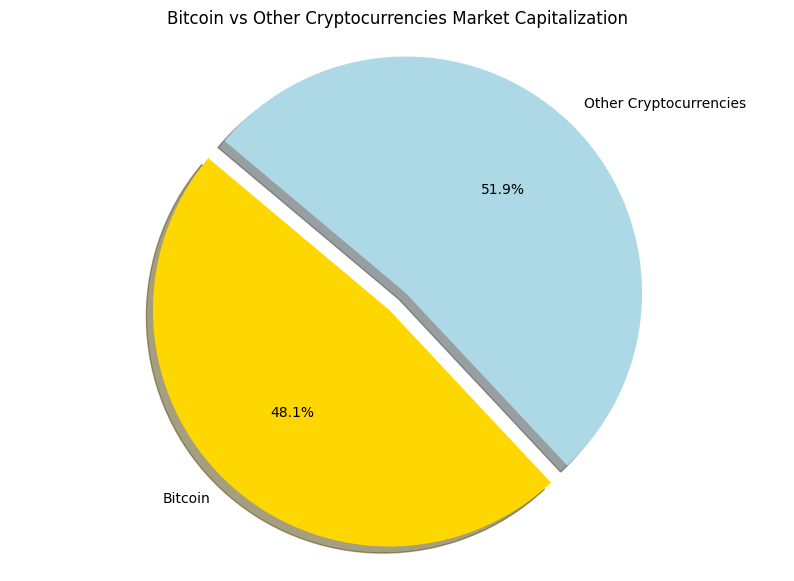

Bitcoin's Average Market Cap: $120,876,059,112.88
Combined Average Market Cap of Other Cryptocurrencies: $130,482,364,082.19
Bitcoin's Market Cap as a Percentage of Total: 48.09%


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_crypto_data(folder_path):
    combined_data = pd.DataFrame()
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            currency_name = filename.split('_')[1].replace('.csv', '').strip().lower()
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
            required_cols = {'date', 'close', 'marketcap'}
            if not required_cols.issubset(df.columns):
                print(f"Skipping {filename} due to missing columns.")
                continue
            df['currency'] = currency_name
            combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

def analyze_bitcoin_vs_others(combined_data):
    if combined_data.empty:
        print("No valid data loaded. Please check your CSV files.")
        return
    combined_data['date'] = pd.to_datetime(combined_data['date'])
    avg_market_cap = combined_data.groupby('currency')['marketcap'].mean()
    if 'bitcoin' in avg_market_cap:
        bitcoin_market_cap = avg_market_cap['bitcoin']
        other_market_cap = avg_market_cap.drop('bitcoin').sum()
        total_market_cap = bitcoin_market_cap + other_market_cap
        bitcoin_percentage = (bitcoin_market_cap / total_market_cap) * 100

        # Pie chart
        labels = ['Bitcoin', 'Other Cryptocurrencies']
        sizes = [bitcoin_market_cap, other_market_cap]
        colors = ['gold', 'lightblue']
        explode = (0.1, 0)
        plt.figure(figsize=(10, 7))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                shadow=True, startangle=140)
        plt.title('Bitcoin vs Other Cryptocurrencies Market Capitalization')
        plt.axis('equal')
        plt.show()

        # Print results
        print(f"Bitcoin's Average Market Cap: ${bitcoin_market_cap:,.2f}")
        print(f"Combined Average Market Cap of Other Cryptocurrencies: ${other_market_cap:,.2f}")
        print(f"Bitcoin's Market Cap as a Percentage of Total: {bitcoin_percentage:.2f}%")
    else:
        print("Bitcoin data not found in the dataset.")

# Set your actual folder path here
folder_path = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'
combined_data = load_crypto_data(folder_path)
analyze_bitcoin_vs_others(combined_data)

Which currencies are more volatile and which ones are more stable?

Most Volatile Currency: dogecoin (Std Dev: 0.113458)
Most Stable Currency: usdcoin (Std Dev: 0.004592)


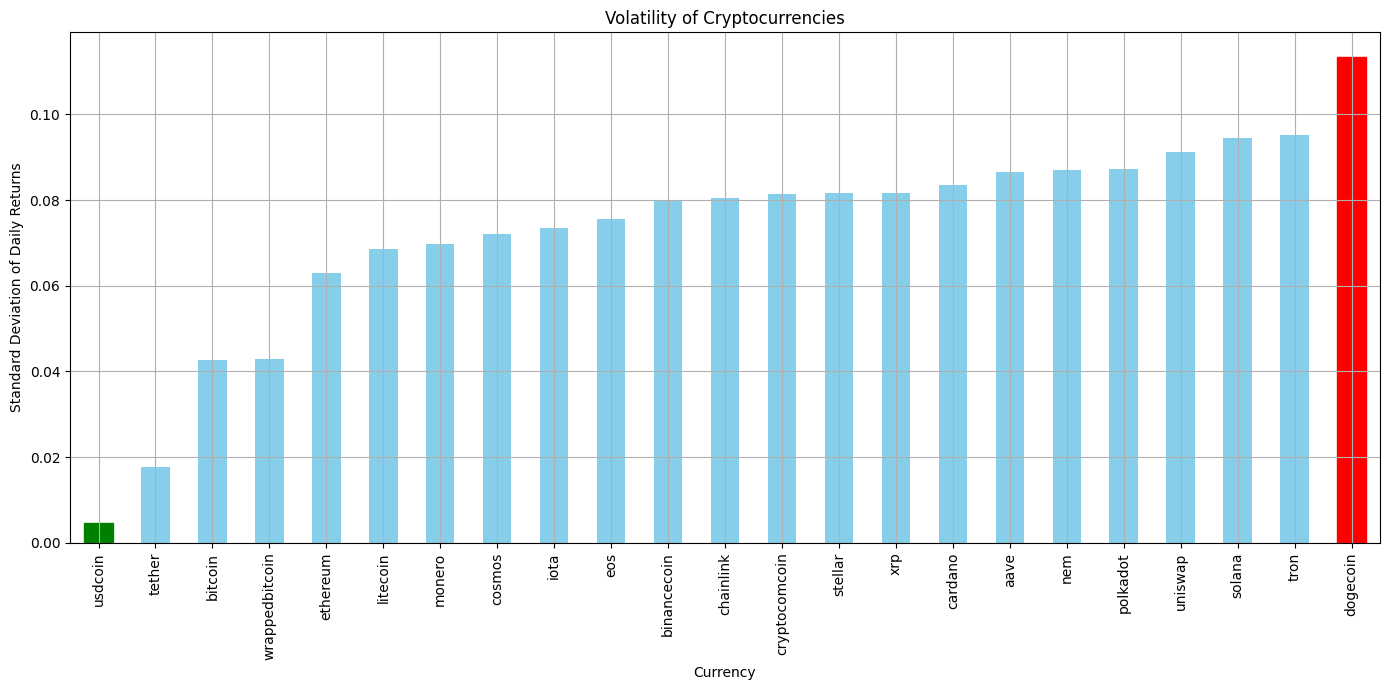

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set your actual folder path here
folder_path = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'

combined_data = pd.DataFrame()

# Load and combine data
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        currency_name = filename.split('_')[1].replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
        if {'date', 'close', 'marketcap'}.issubset(df.columns):
            df['currency'] = currency_name.lower()
            combined_data = pd.concat([combined_data, df], ignore_index=True)

if not combined_data.empty:
    combined_data['date'] = pd.to_datetime(combined_data['date'])

    # Calculate daily returns
    combined_data['daily_return'] = combined_data.groupby('currency')['close'].pct_change()

    # Calculate standard deviation of daily returns
    volatility = combined_data.groupby('currency')['daily_return'].std()

    # Identify most volatile and most stable (only one each)
    most_volatile_currency = volatility.idxmax()
    most_stable_currency = volatility.idxmin()

    print(f"Most Volatile Currency: {most_volatile_currency} (Std Dev: {volatility[most_volatile_currency]:.6f})")
    print(f"Most Stable Currency: {most_stable_currency} (Std Dev: {volatility[most_stable_currency]:.6f})")

    # Plot
    plt.figure(figsize=(14, 7))
    bars = volatility.sort_values().plot(kind='bar', color='skyblue')
    bars.patches[list(volatility.sort_values().index).index(most_volatile_currency)].set_color('red')
    bars.patches[list(volatility.sort_values().index).index(most_stable_currency)].set_color('green')
    plt.xlabel('Currency')
    plt.ylabel('Standard Deviation of Daily Returns')
    plt.title('Volatility of Cryptocurrencies')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data found. Please check your folder path and CSV files.")

How does the price fluctuations of currencies correlate with each other?

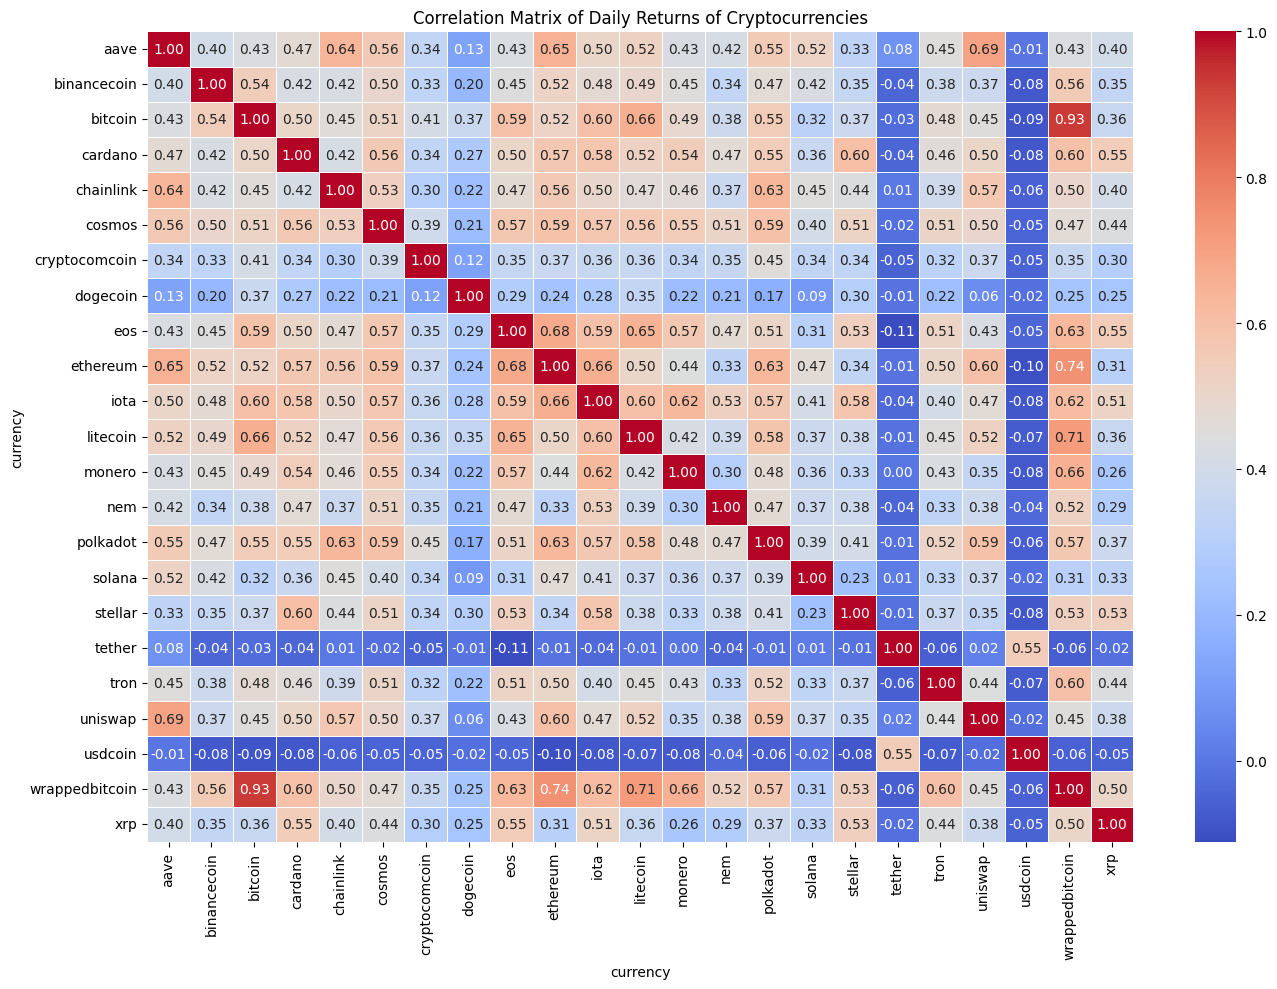


Correlation Summary Table:
      Currency Most Positively Correlated  Max Correlation Most Negatively Correlated  Min Correlation
          aave                    uniswap         0.691837                    usdcoin        -0.006949
   binancecoin             wrappedbitcoin         0.557039                    usdcoin        -0.076940
       bitcoin             wrappedbitcoin         0.930797                    usdcoin        -0.088752
       cardano                    stellar         0.603466                    usdcoin        -0.082321
     chainlink                       aave         0.635768                    usdcoin        -0.058690
        cosmos                   polkadot         0.594291                    usdcoin        -0.050558
 cryptocomcoin                   polkadot         0.454812                     tether        -0.054682
      dogecoin                    bitcoin         0.369433                    usdcoin        -0.016725
           eos                   ethereum    

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set your actual folder path here
folder_path = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'

combined_data = pd.DataFrame()

# Load and combine data
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        currency_name = filename.split('_')[1].replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
        if {'date', 'close', 'marketcap'}.issubset(df.columns):
            df['currency'] = currency_name.lower()
            combined_data = pd.concat([combined_data, df], ignore_index=True)

if not combined_data.empty:
    combined_data['date'] = pd.to_datetime(combined_data['date'])

    # Calculate daily returns
    combined_data['daily_return'] = combined_data.groupby('currency')['close'].pct_change()

    # Pivot to get currencies as columns
    pivot_data = combined_data.pivot(index='date', columns='currency', values='daily_return')

    # Compute correlation matrix
    correlation_matrix = pivot_data.corr()

    # Plot heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Daily Returns of Cryptocurrencies')
    plt.tight_layout()
    plt.show()

    # Provide a summary table: for each currency, show the currency it is most positively and most negatively correlated with
    summary = []
    for currency in correlation_matrix.columns:
        corrs = correlation_matrix[currency].drop(currency)
        most_pos = corrs.idxmax()
        most_neg = corrs.idxmin()
        summary.append({
            'Currency': currency,
            'Most Positively Correlated': most_pos,
            'Max Correlation': corrs[most_pos],
            'Most Negatively Correlated': most_neg,
            'Min Correlation': corrs[most_neg]
        })
    summary_df = pd.DataFrame(summary)
    print("\nCorrelation Summary Table:")
    print(summary_df.to_string(index=False))
else:
    print("No valid data found. Please check your folder path and CSV files.")

Seasonal trend in the price fluctuations


Skipping coin_Aave due to insufficient data for seasonal decomposition.


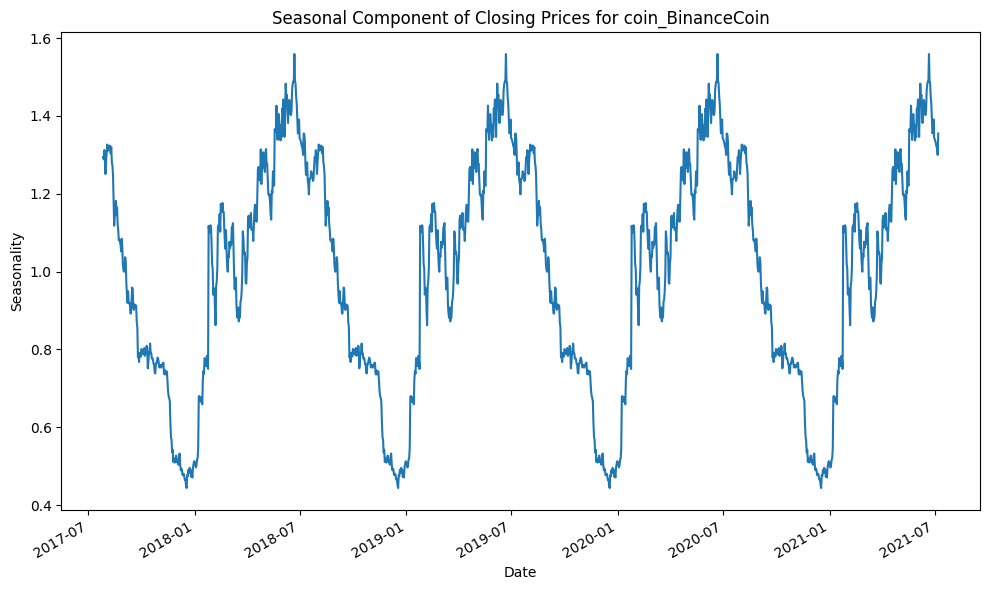

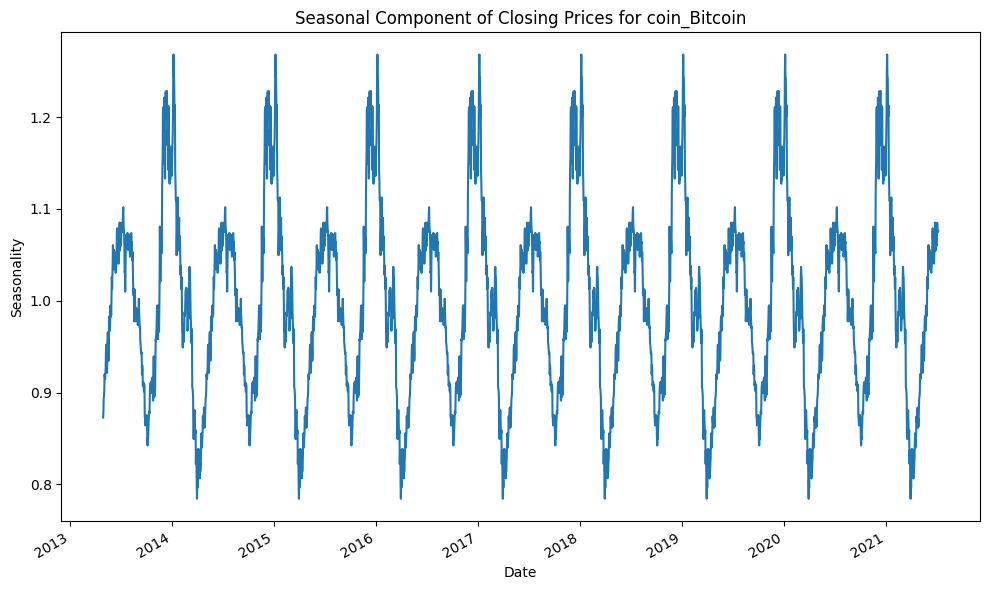

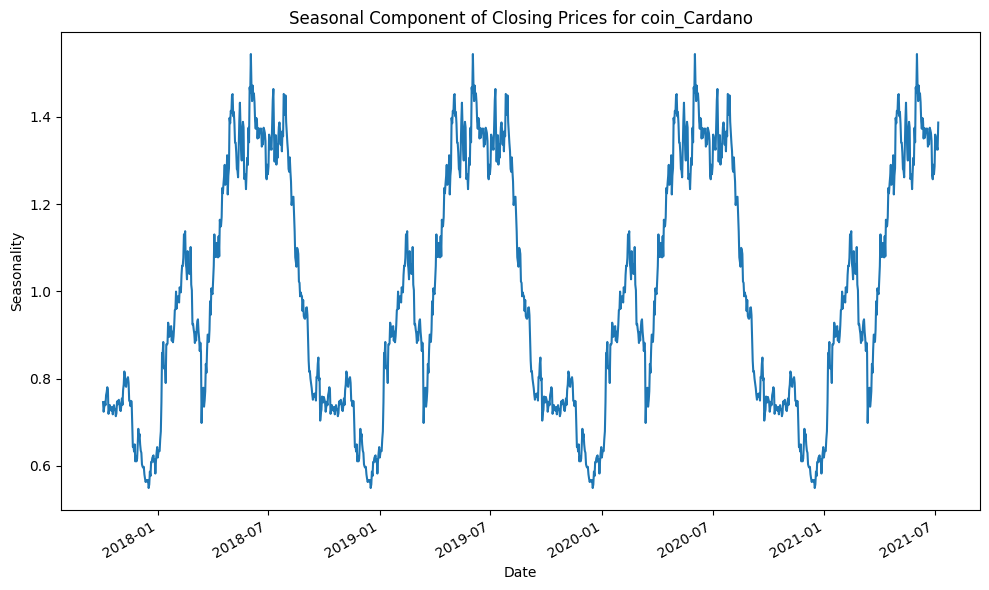

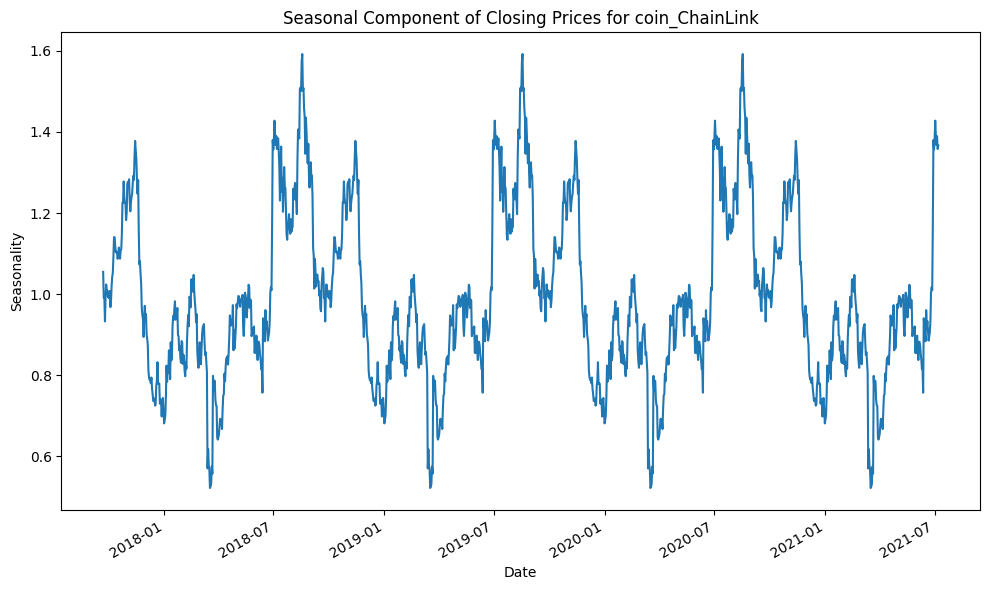

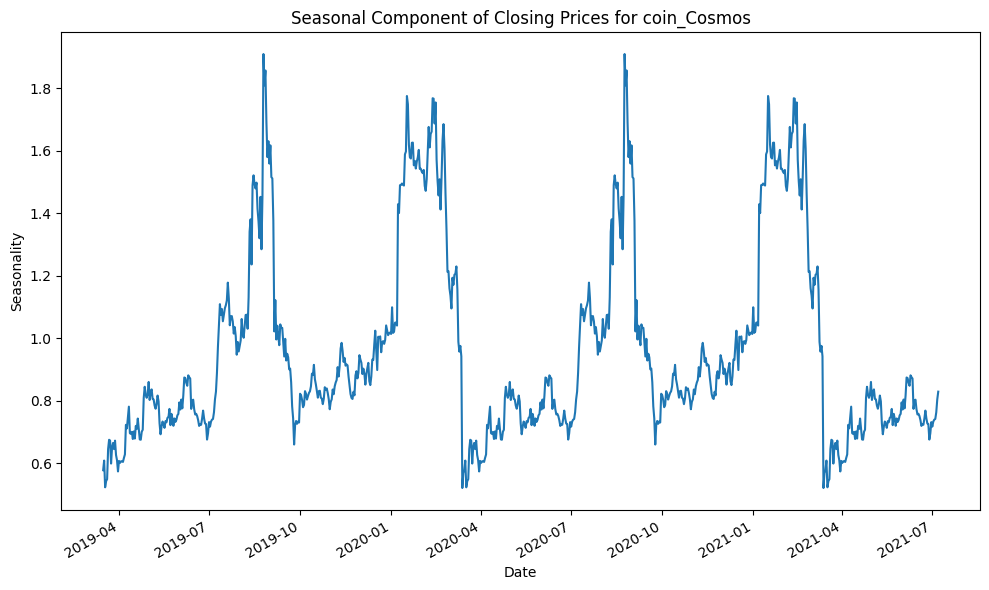

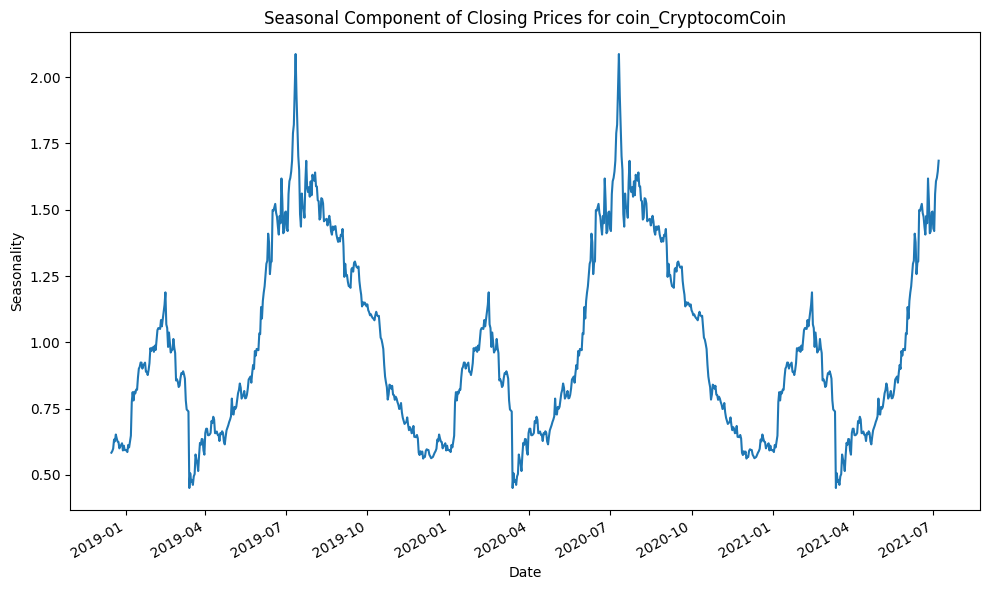

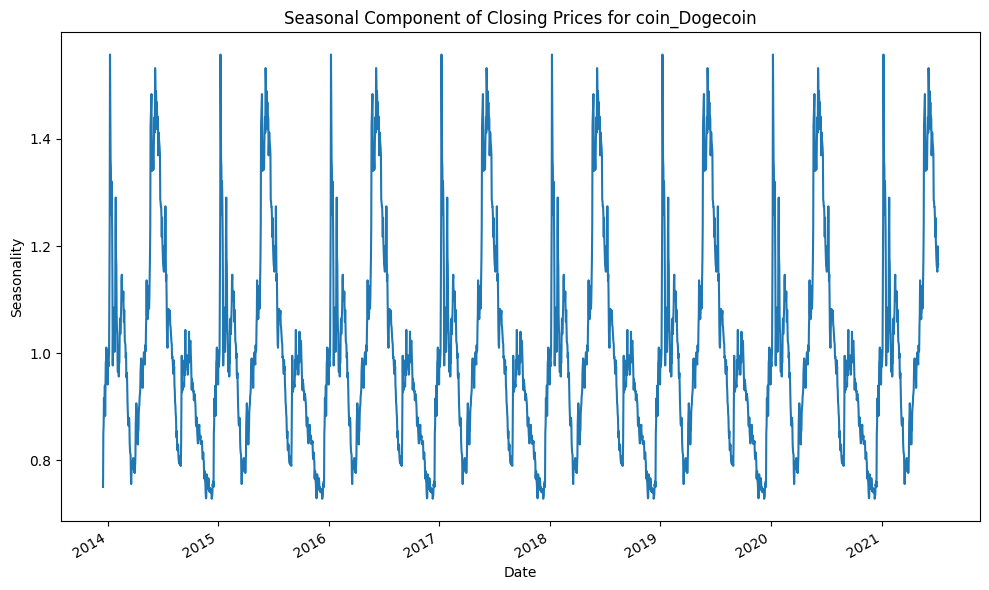

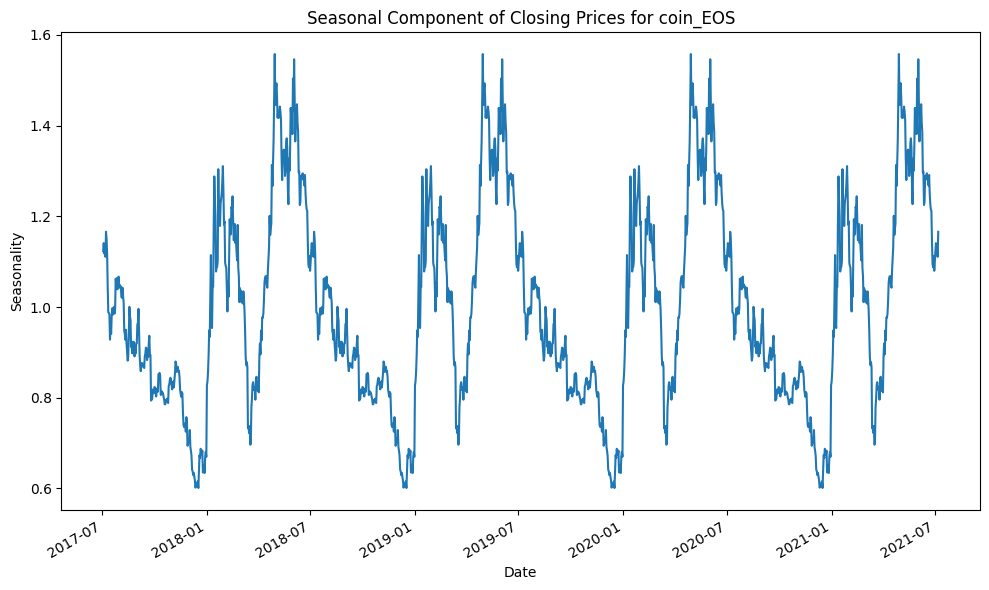

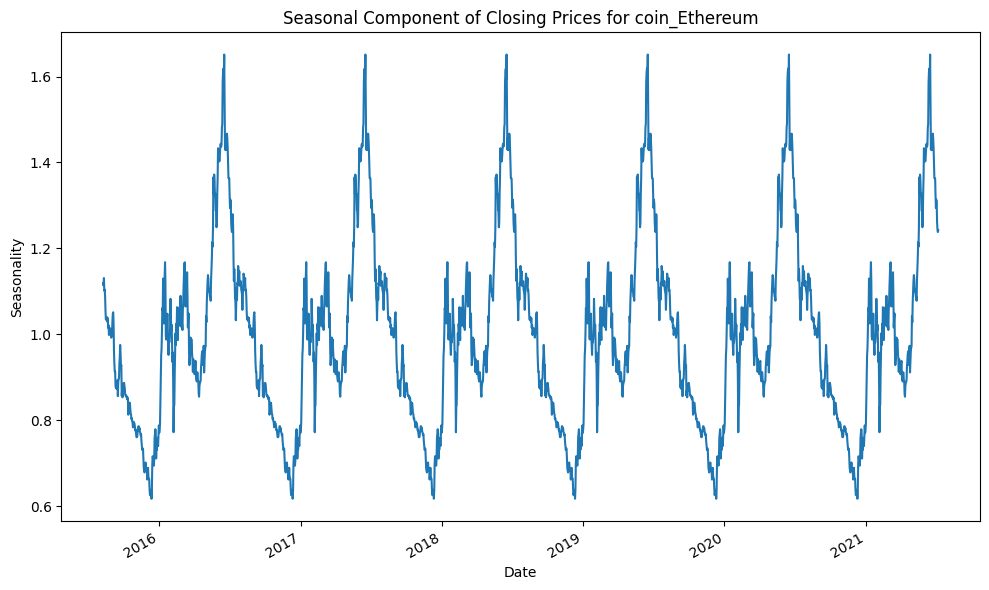

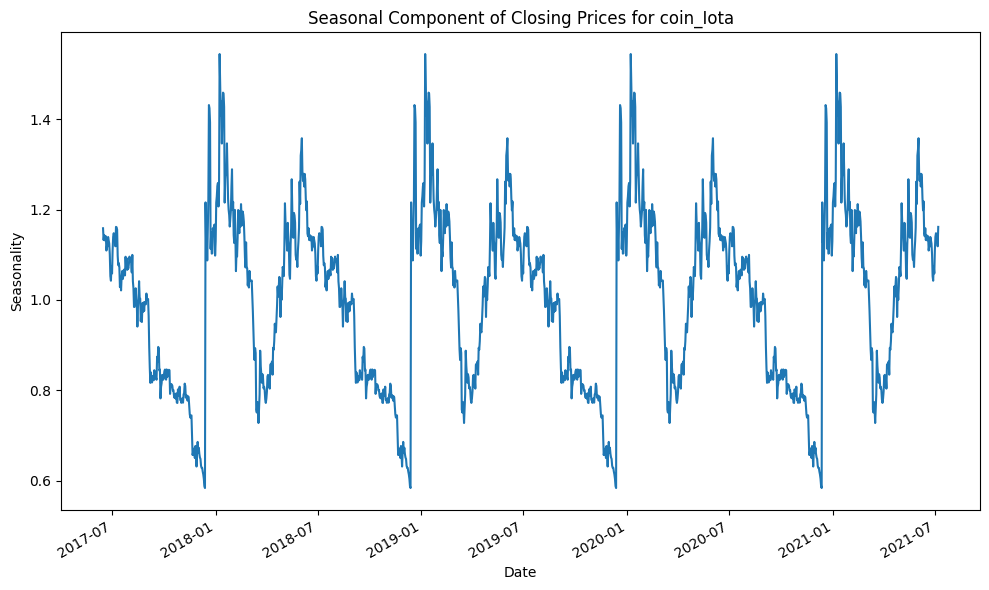

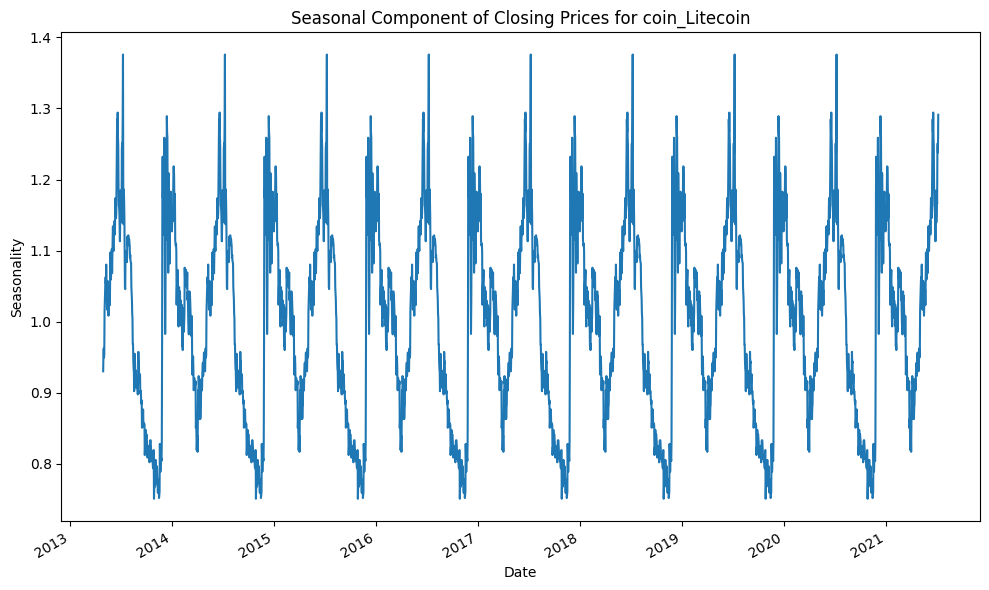

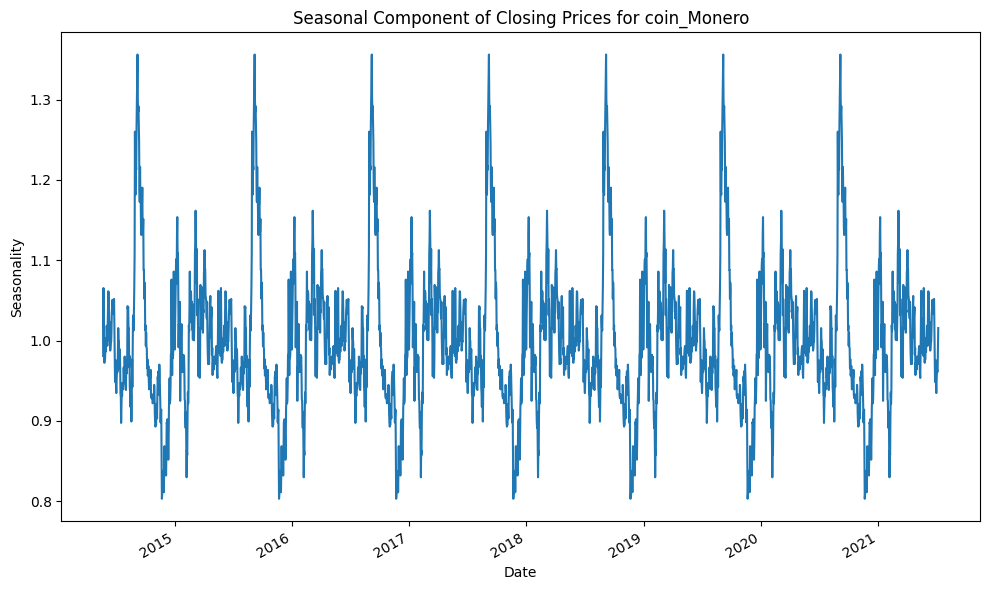

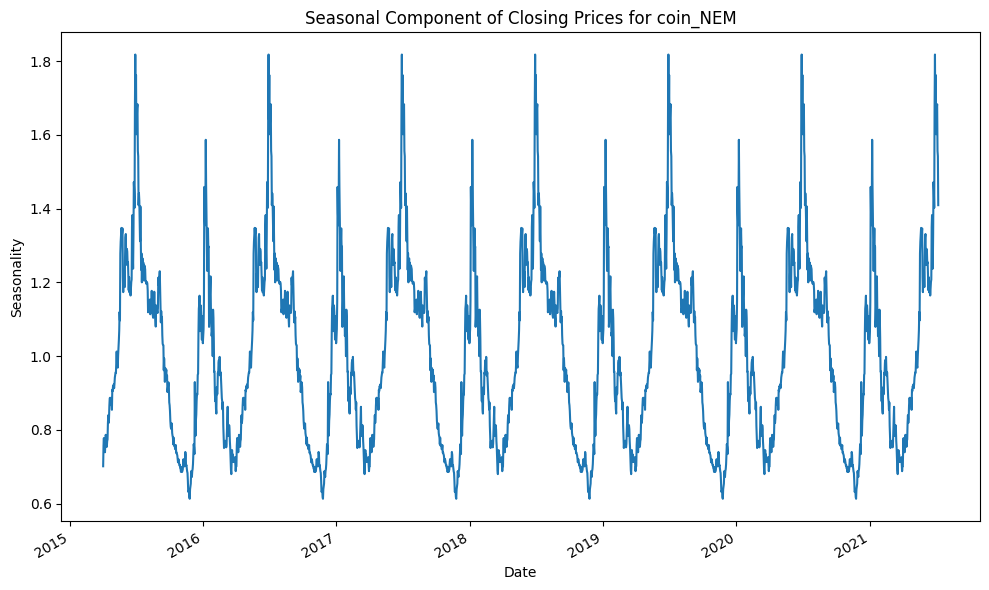

Skipping coin_Polkadot due to insufficient data for seasonal decomposition.
Could not decompose coin_Solana: x must have 2 complete cycles requires 730 observations. x only has 452 observation(s)


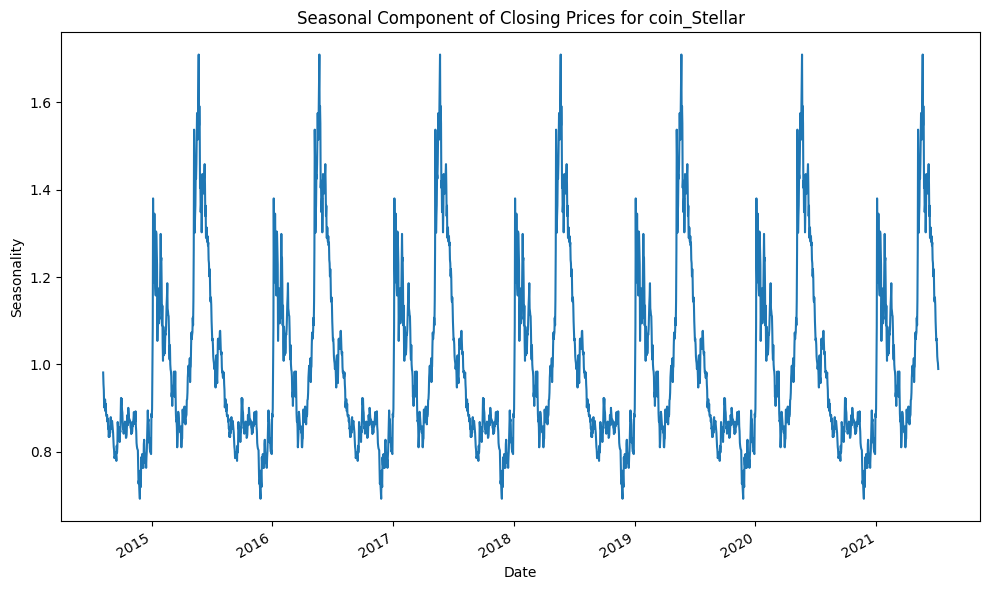

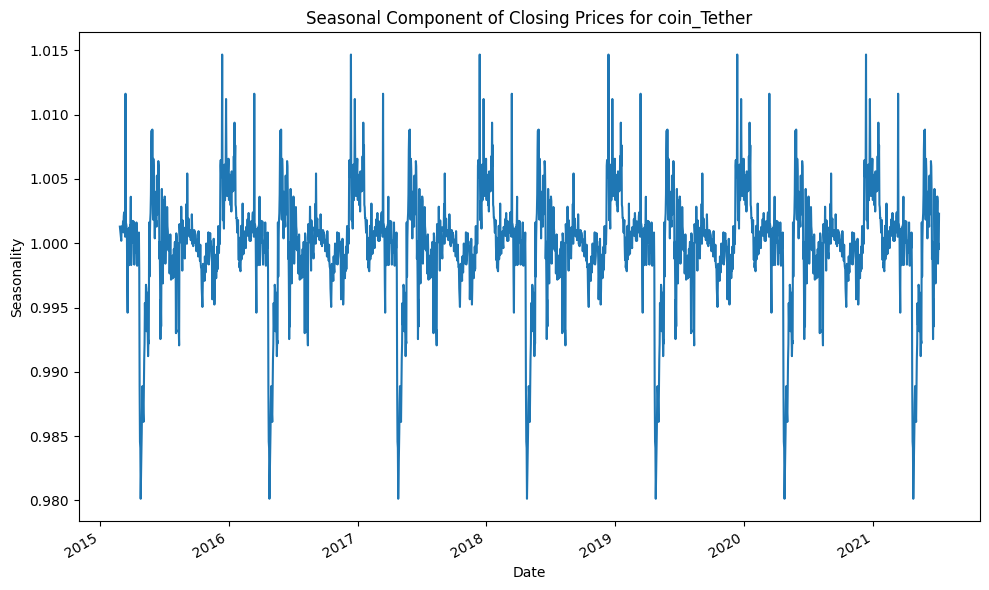

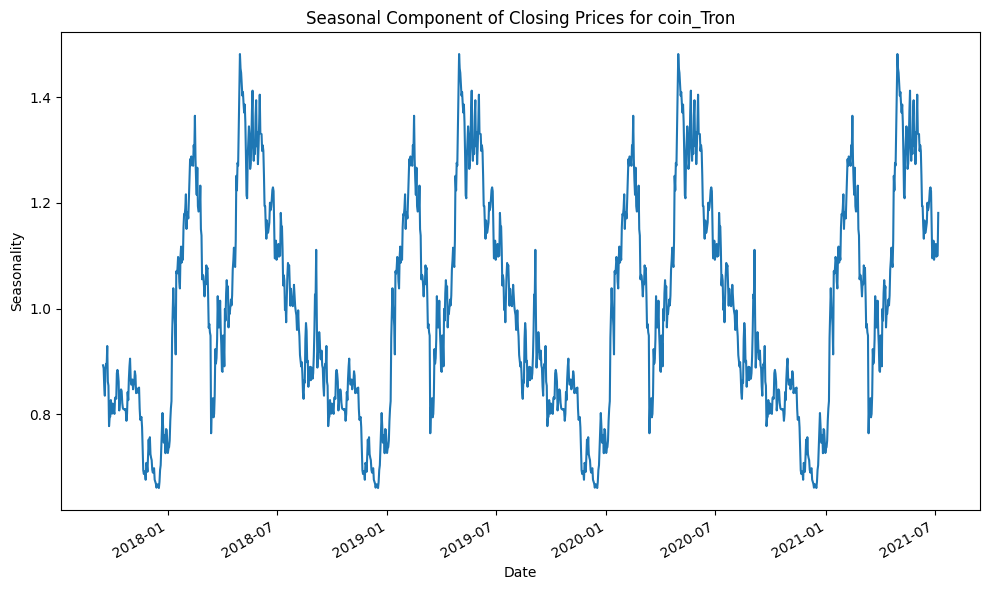

Skipping coin_Uniswap due to insufficient data for seasonal decomposition.


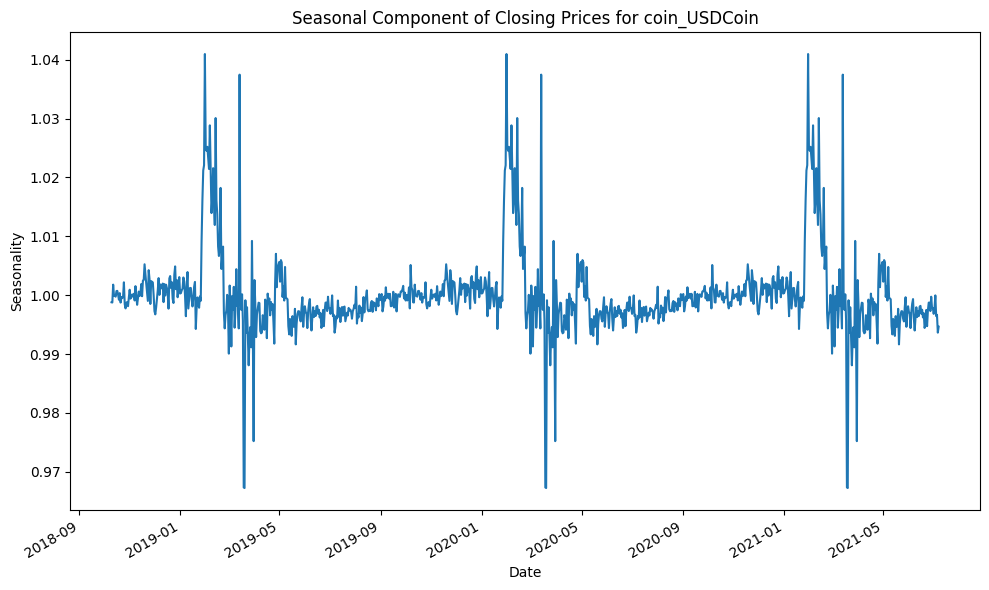

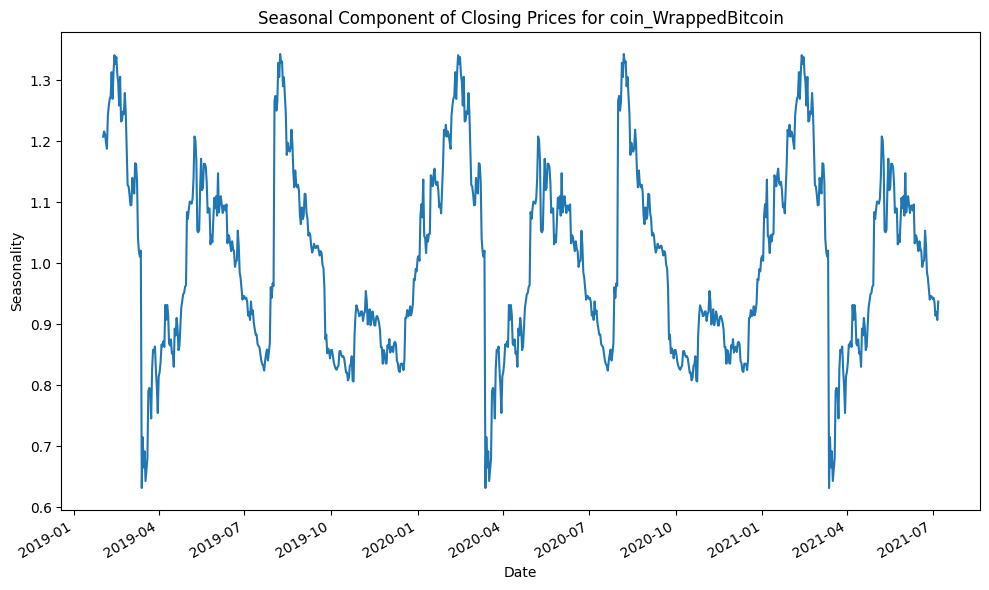

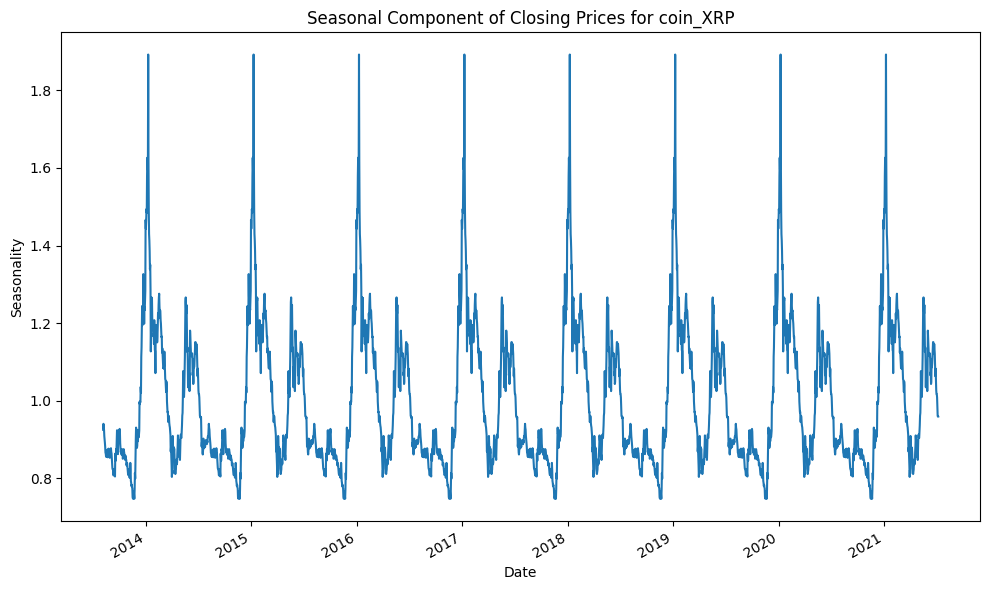

In [15]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set your folder path
folder_path = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        currency_name = filename.replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Standardize column names
        df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

        # Check if required columns exist
        if 'date' not in df.columns or 'close' not in df.columns:
            print(f"Skipping {filename} due to missing columns.")
            continue

        # Convert date column and sort
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        df.set_index('date', inplace=True)

        # Ensure enough data points for decomposition
        if len(df) < 365:
            print(f"Skipping {currency_name} due to insufficient data for seasonal decomposition.")
            continue

        # Perform seasonal decomposition
        try:
            result = seasonal_decompose(df['close'], model='multiplicative', period=365)
            plt.figure(figsize=(10, 6))
            result.seasonal.plot(title=f'Seasonal Component of Closing Prices for {currency_name}')
            plt.xlabel('Date')
            plt.ylabel('Seasonality')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not decompose {currency_name}: {e}")


Predicting the future price of the currencies

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


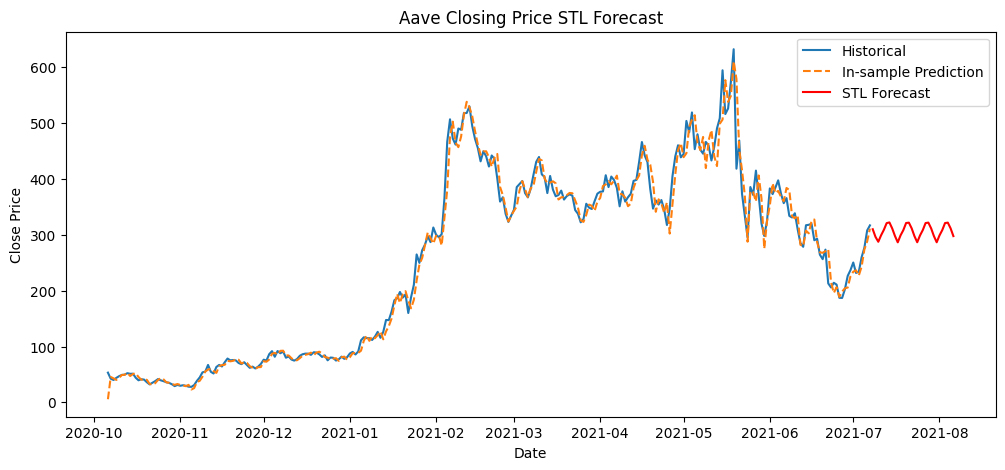

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


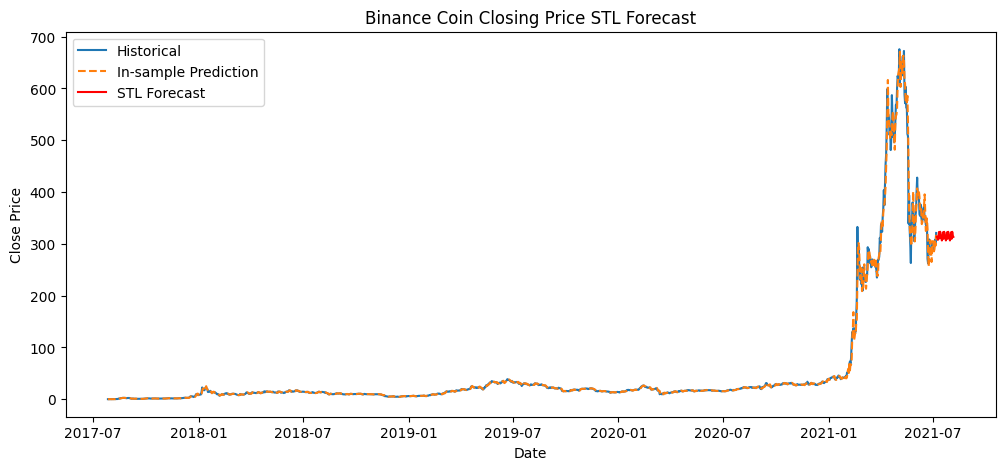

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


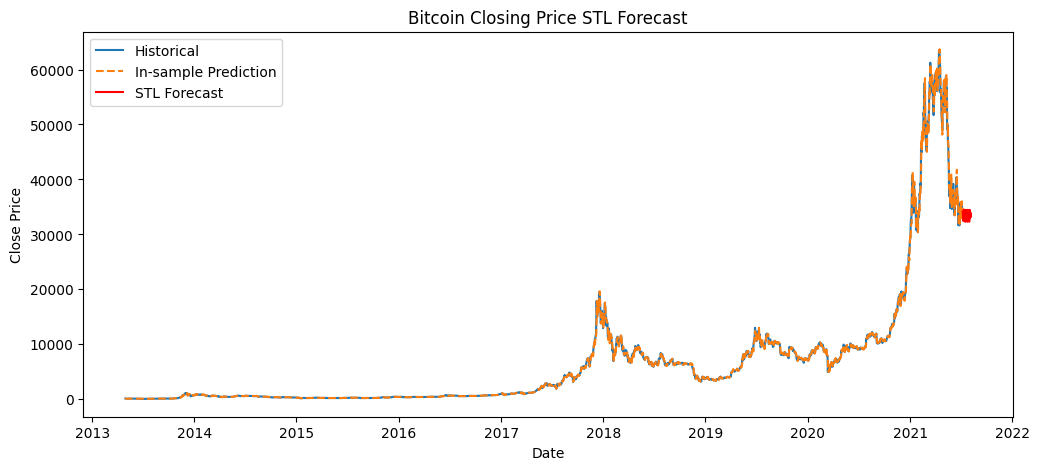

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


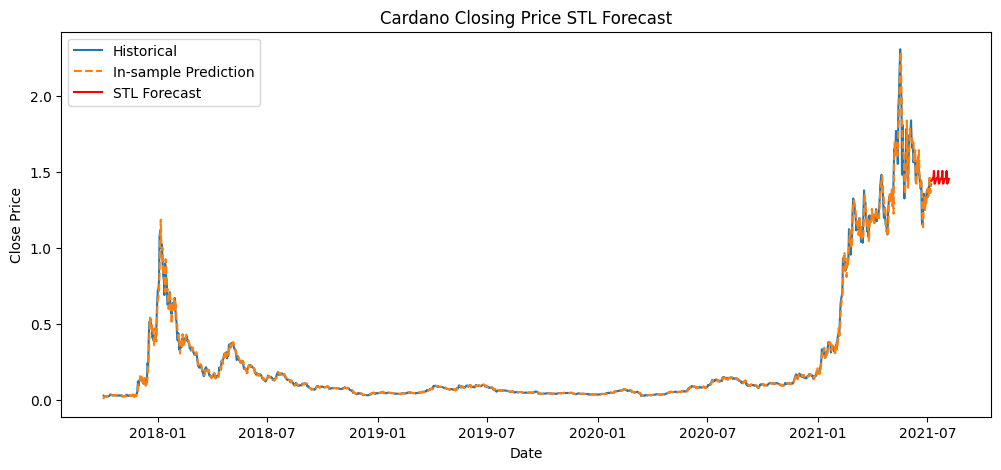

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


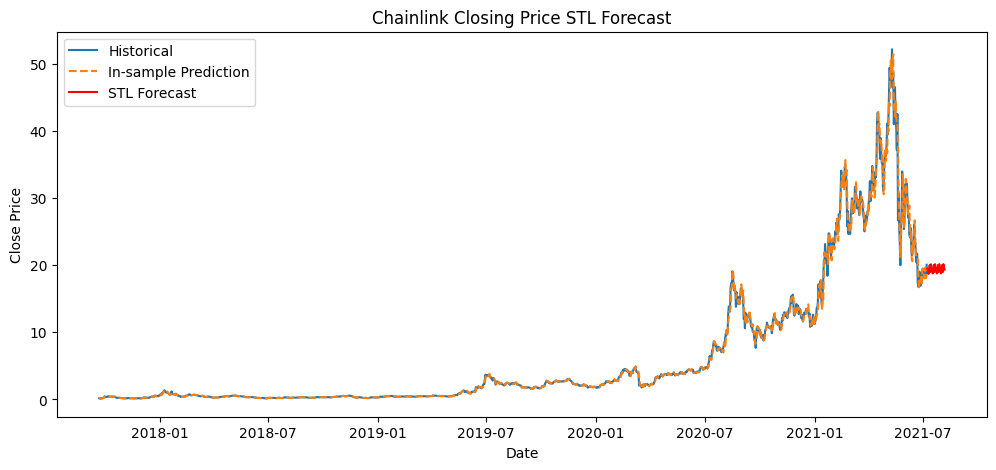

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


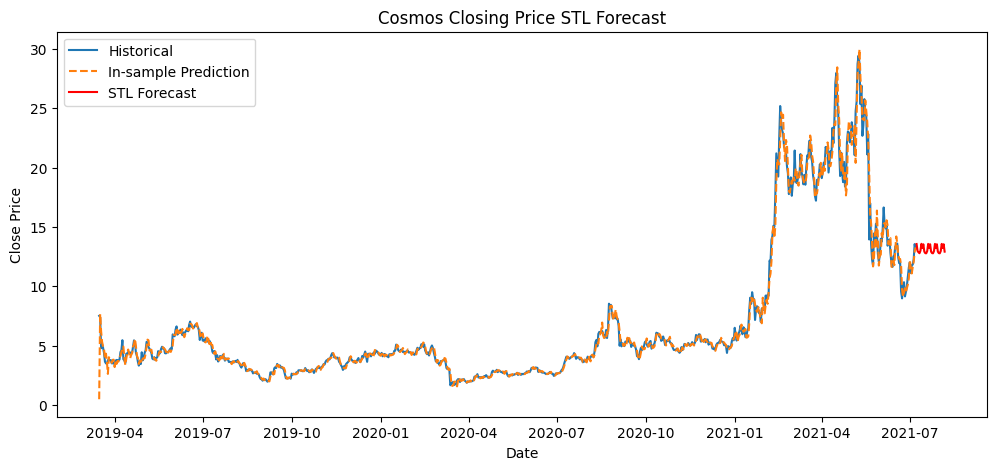

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


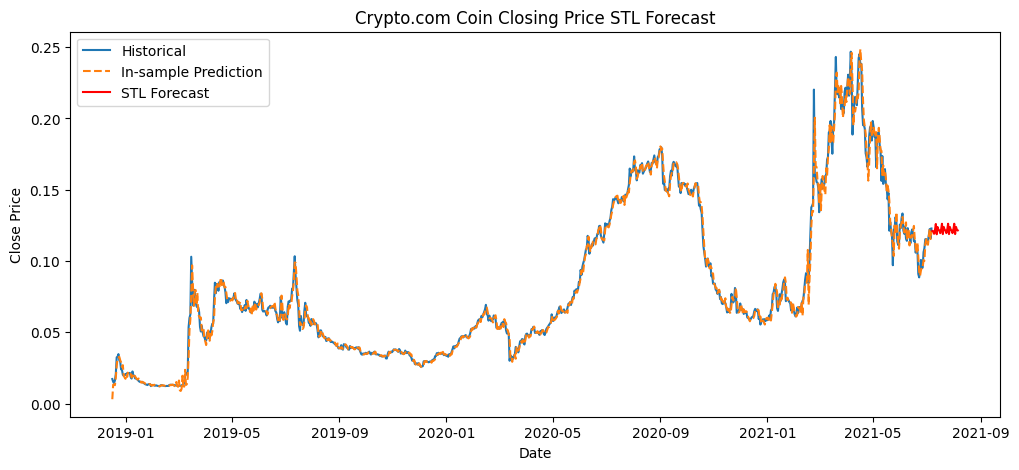

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


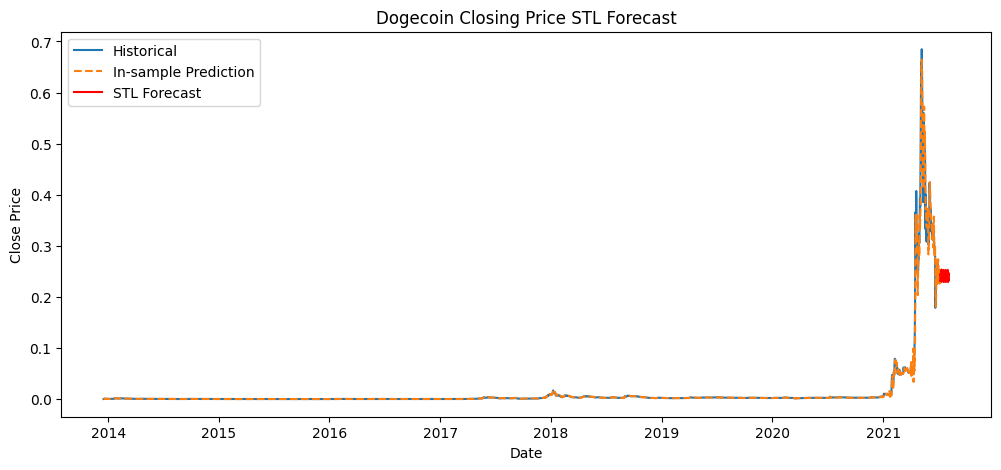

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


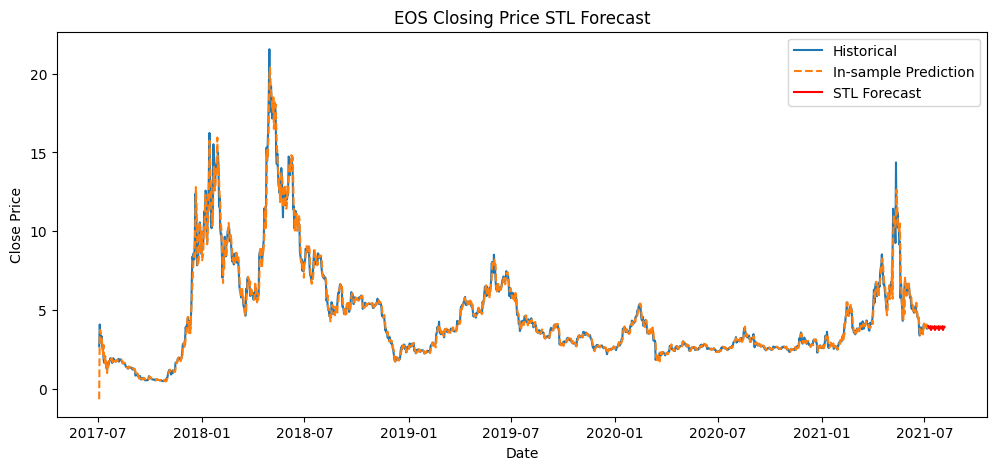

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


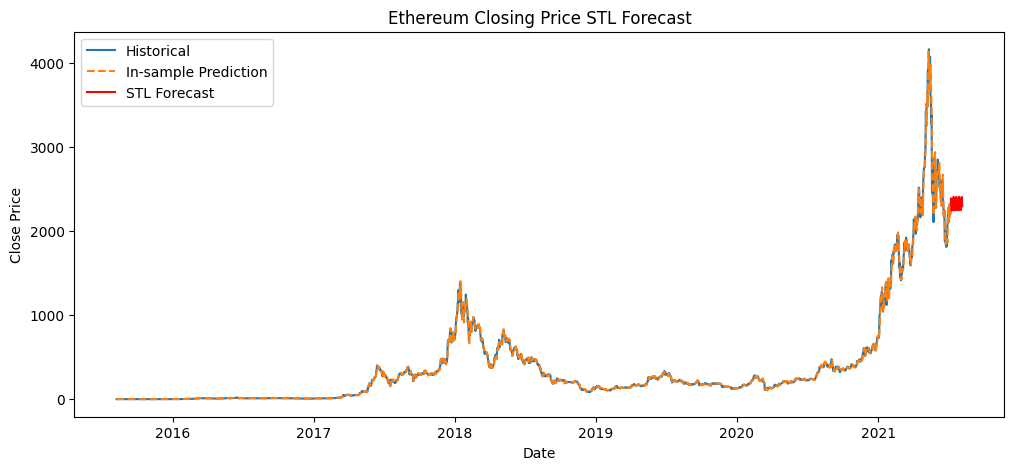

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


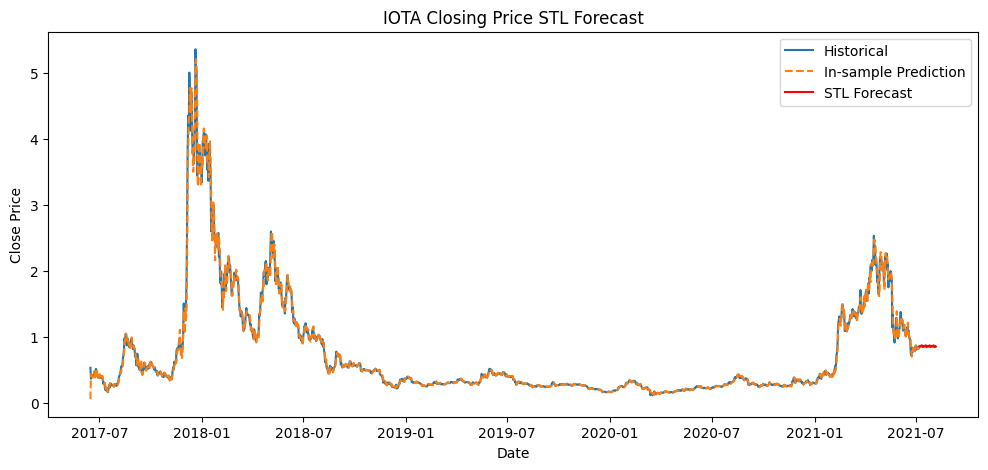

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


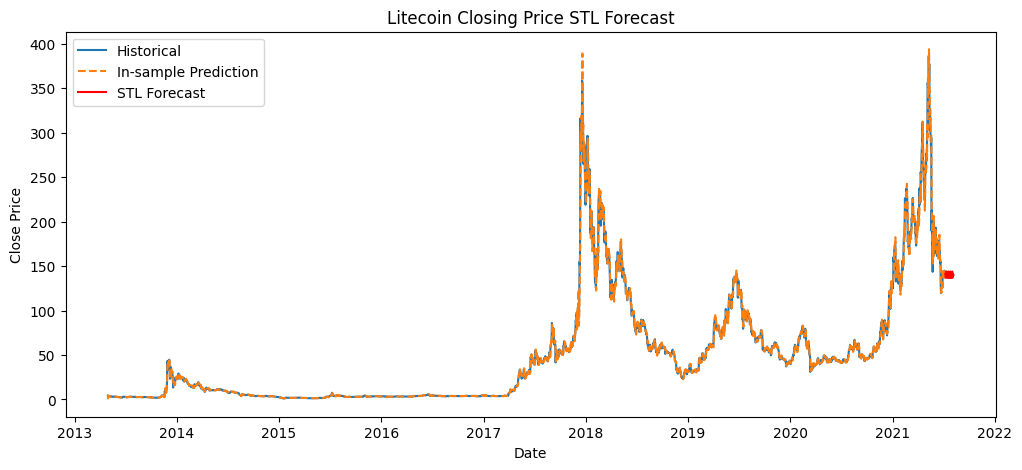

Could not forecast Monero: Unable to determine period from endog


c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


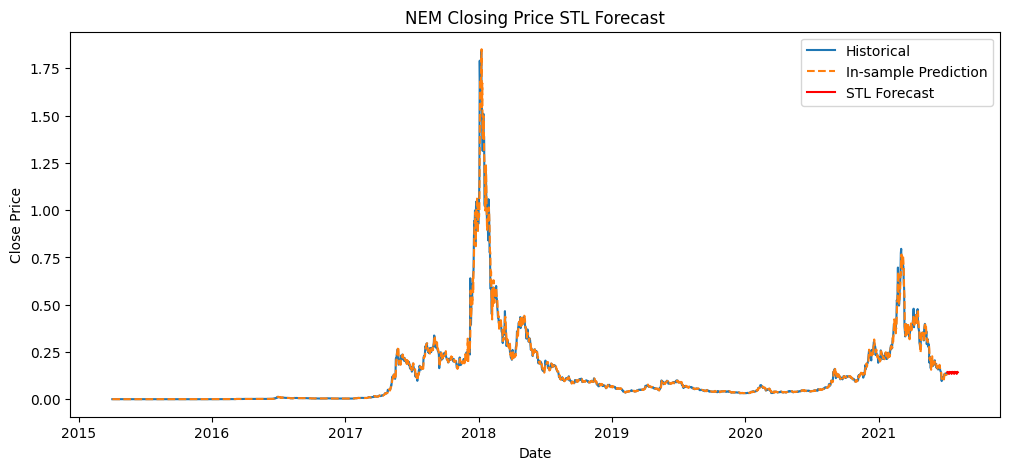

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


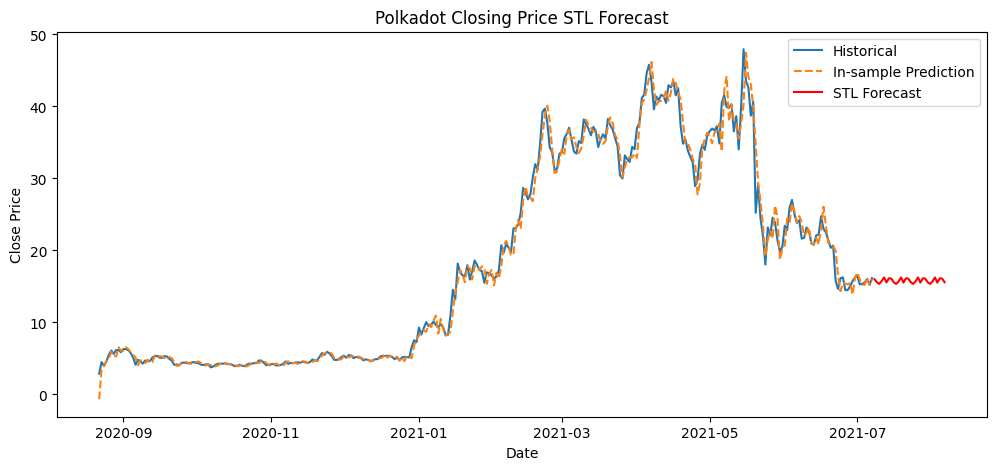

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


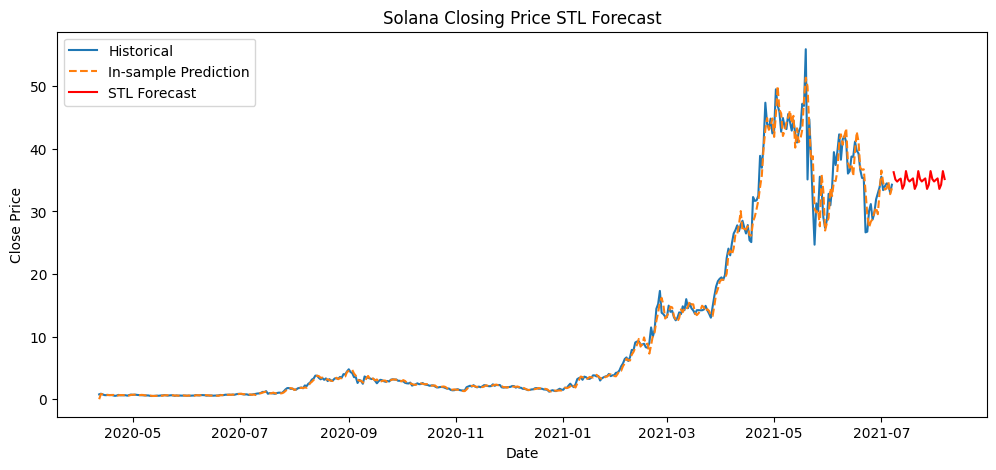

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


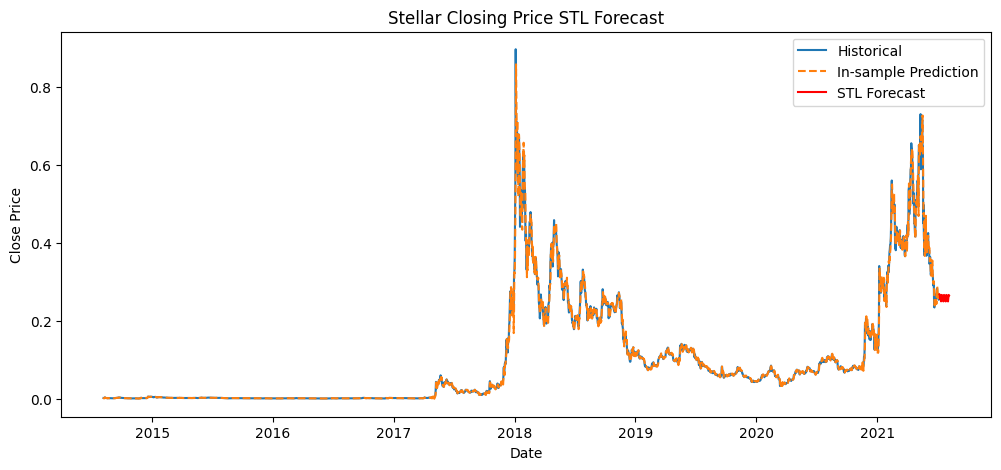

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


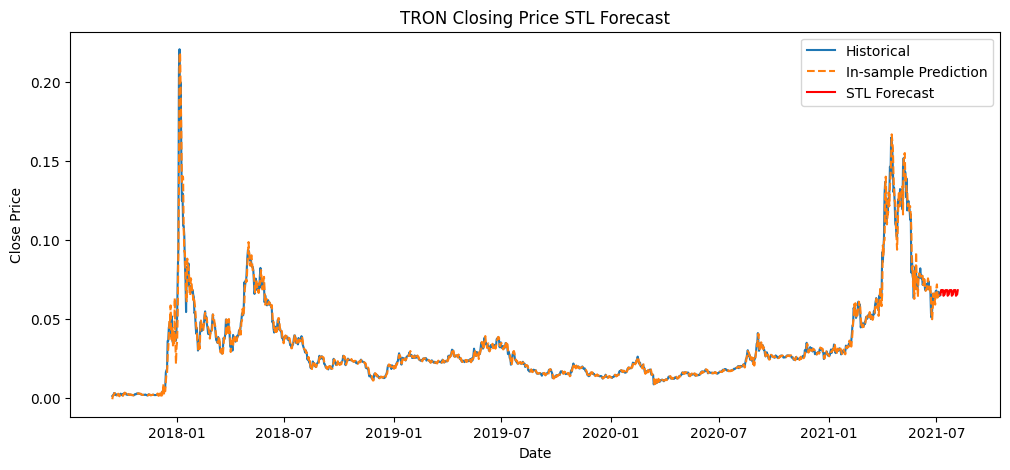

Could not forecast Tether: Unable to determine period from endog


c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


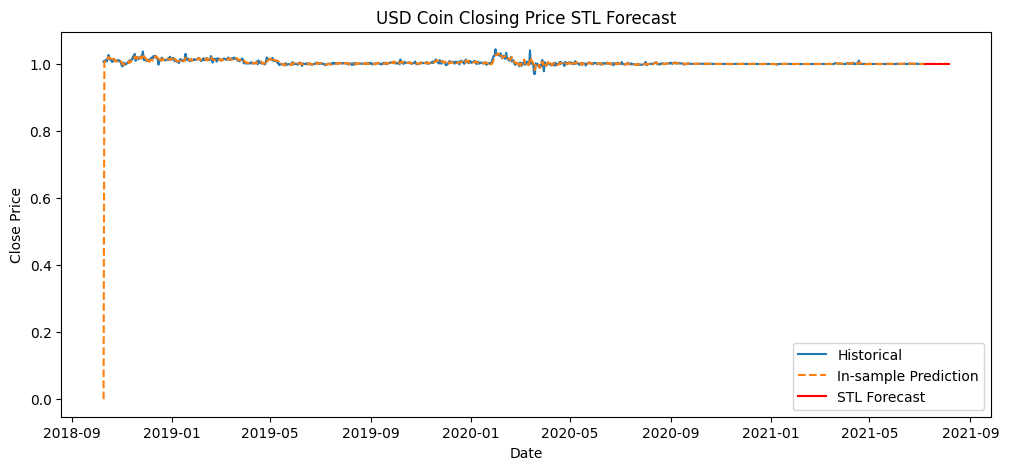

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


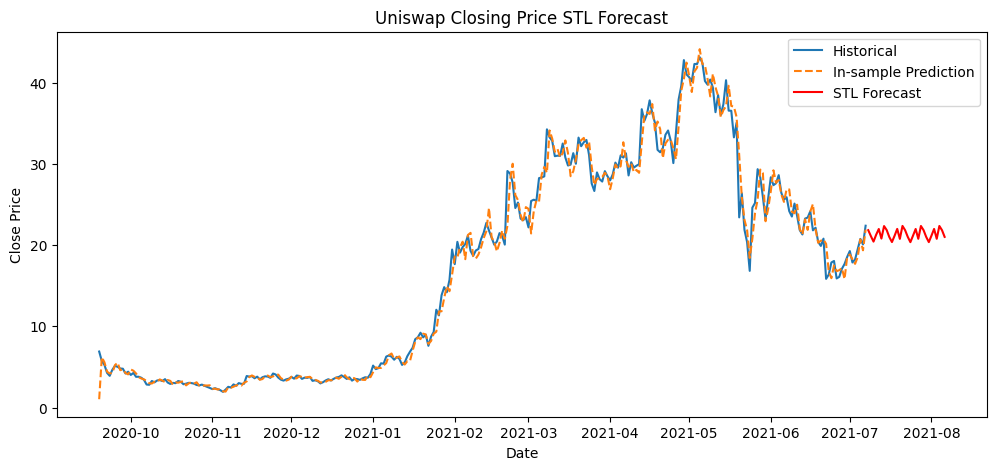

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


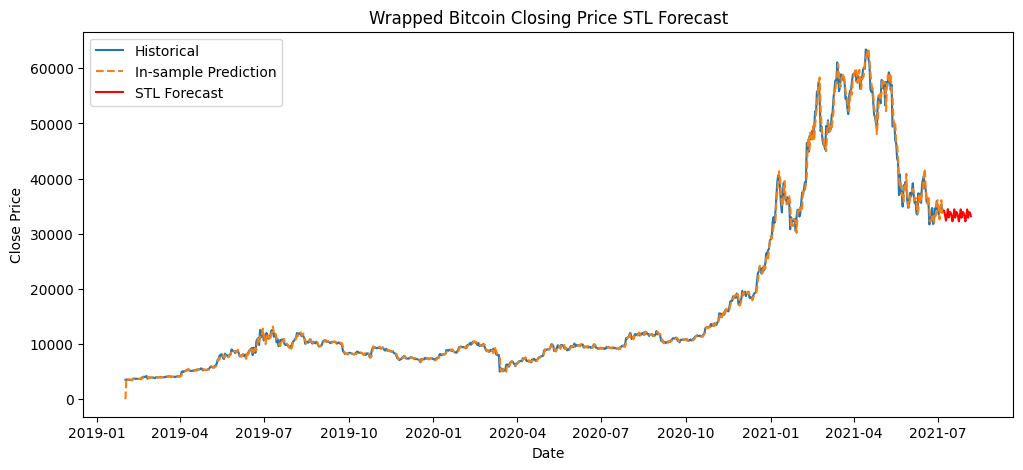

c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varun.Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


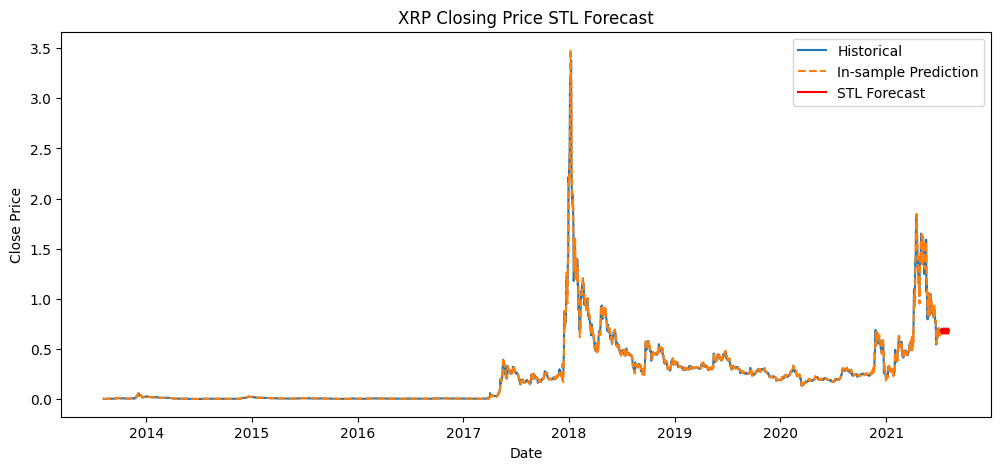

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

crypto_folder = r'C:\Users\Varun.Bhargav\Downloads\CopilotHackathon-main\CopilotHackathon-main\crypto'
all_files = [
    os.path.join(crypto_folder, f)
    for f in os.listdir(crypto_folder)
    if f.endswith('.csv')
]

# Concatenate all data into a single DataFrame, standardize columns
df_list = []
for f in all_files:
    df = pd.read_csv(f)
    df.columns = [col.strip().capitalize() for col in df.columns]
    df_list.append(df)
crypto_df = pd.concat(df_list, ignore_index=True)

# Standardize column names
if 'Name' not in crypto_df.columns:
    if 'Currency' in crypto_df.columns:
        crypto_df.rename(columns={'Currency': 'Name'}, inplace=True)
if 'Close' not in crypto_df.columns:
    if 'close' in crypto_df.columns:
        crypto_df.rename(columns={'close': 'Close'}, inplace=True)
if 'Date' not in crypto_df.columns:
    if 'date' in crypto_df.columns:
        crypto_df.rename(columns={'date': 'Date'}, inplace=True)

# Ensure correct column types and drop missing
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])
crypto_df = crypto_df.sort_values(['Name', 'Date'])
crypto_df = crypto_df.dropna(subset=['Close', 'Name', 'Date'])
crypto_df['Close'] = pd.to_numeric(crypto_df['Close'], errors='coerce')
crypto_df = crypto_df.dropna(subset=['Close'])

future_steps = 30

for coin, group in crypto_df.groupby('Name'):
    series = group.set_index('Date')['Close'].astype(float)
    if len(series) < 40:
        print(f"Skipping {coin} due to insufficient data.")
        continue
    try:
        stl_forecast = STLForecast(series, ARIMA, model_kwargs={"order": (5,1,0)})
        stl_model = stl_forecast.fit()
        forecast = stl_model.forecast(future_steps)
        in_sample_pred = stl_model.get_prediction().predicted_mean

        plt.figure(figsize=(12, 5))
        plt.plot(series, label='Historical')
        plt.plot(in_sample_pred.index, in_sample_pred, label='In-sample Prediction', linestyle='--')
        plt.plot(pd.date_range(series.index[-1], periods=future_steps+1, freq='D')[1:], forecast, label='STL Forecast', color='red')
        plt.title(f'{coin} Closing Price STL Forecast')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Could not forecast {coin}: {e}")